In [14]:
#########################
## David Hui
##
## 1/6/2018
##
## Media Sources
#########################

In [15]:
# SOLUTION
# Dependencies
import tweepy
import time
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys

consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Target Search Term

target_terms = ("@BBC","@CBS","@CNN","@Fox","@NewYorkTimes")

# "Real Person" Filters
min_tweets = 1
max_tweets = 100000
max_followers = 11500
max_following = 11500
lang = "en"
current_date = time.strftime("%m/%d/%Y")

# Array to hold sentiment
sentiment = []

# Variable for holding the oldest tweet
oldest_tweet = ""
sentiment_list = []

# Variables for CSV file
csv_created_at_list = []
csv_username_list = []
csv_text_list = []
csv_compound_list = []
csv_positive_list = []
csv_negative_list = []
csv_neutral_list = []
csv_target_list = []
    
# Loop through all target users
for target in target_terms:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    #print("target = " + target)

    # Loop through 10 times (total of 1500 tweets)
    for x in range(1):

        # Run search around each tweet
        public_tweets = api.search(target, count=100, result_type="recent")
        
        #print (target)
        
        # Loop through all tweets
        for tweet in public_tweets["statuses"]:
            
            #print (tweet["text"])
            #print (tweet["user"]["name"])
            # Use filters to check if user meets conditions
            #if ((tweet["user"]["followers_count"] < max_followers and
            #    tweet["user"]["statuses_count"] > min_tweets and
            #    tweet["user"]["statuses_count"] < max_tweets and
            #    tweet["user"]["friends_count"] < max_following and
            #        tweet["user"]["lang"] == lang)) or 1==1:
            # Run Vader Analysis on each tweet
            
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            # Add each value to the appropriate array
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            
            # save data for CSV file
            csv_created_at_list.append(tweet["created_at"])
            csv_username_list.append(tweet["user"]["name"])
            csv_compound_list.append(compound)
            csv_positive_list.append(pos)
            csv_negative_list.append(neg)
            csv_neutral_list.append(neu)
            csv_text_list.append(tweet["text"])
            csv_target_list.append(target)
            
            # Store the Average Sentiments
            #sentiment_data = {

                
                    #"Media": target,
                    #"Created": tweet["created_at"],
                    #"Source": tweet["user"]["name"],
                    #"Text": tweet["text"],
                    #"Compound": compound,
                    #"Positive": pos,
                    #"Negative": neg,
                    #"Neutral": neu
        
                 #"Compound": np.mean(compound_list),
                 #"Positive": np.mean(positive_list),
                 #"Neutral": np.mean(negative_list),
                 #"Negative": np.mean(neutral_list),
                 #"Tweet Count": len(compound_list)
            #}
            #print(sentiment)
            
    sentiment_list.append(np.mean(compound_list))
    
    #print(compound_list)
    
    
    x_axis=[]
    for x in range(len(compound_list)):
        x_axis.append(x)
    
    if target == "@BBC":
        color = "lightblue"
    elif target == "@CBS":
        color = "green"
    elif target == "@CNN":
        color="red"
    elif target == "@Fox":
        color = "blue"
    elif target == "@NewYorkTimes":
        color = "gold"
    #print(target,color,str(len(x_axis))) 
    
    # Prepare for Scatter plot
    plt.scatter(x_axis, compound_list, s=100, alpha=0.75, linewidths=1.0, edgecolors="black",facecolors=color, label=target)
 

In [16]:
sentiment_data  = {
    "Media": csv_target_list,
    "Created_at": csv_created_at_list,
    "Source": csv_username_list,
    "Text": csv_text_list,
    "Compound": csv_compound_list,
    "Positive": csv_positive_list,
    "Negative": csv_negative_list,
    "Neutral": csv_neutral_list
    
}  

df = pd.DataFrame(sentiment_data, columns=["Media","Created_at","Source","Text","Compound","Positive","Negative","Neutral"])
df
df.to_csv("sentiment.csv", index=False)

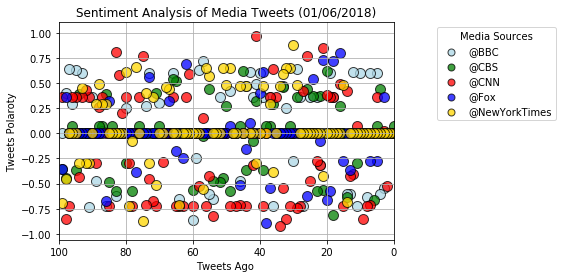

In [17]:
##########################################################
###
## Scatter Chart
##
###
##########################################################


plt.title("Sentiment Analysis of Media Tweets "  + "(" + current_date + ")")
plt.ylabel("Tweets Polaroty")
plt.xlabel("Tweets Ago ")
plt.xlim(len(x_axis),0)
plt.savefig("Media_sources_scatter.png")
plt.grid(True)
plt.legend(loc="upper right",title="Media Sources", markerscale=0.7,bbox_to_anchor=(1.5, 1))
print("")
plt.show()

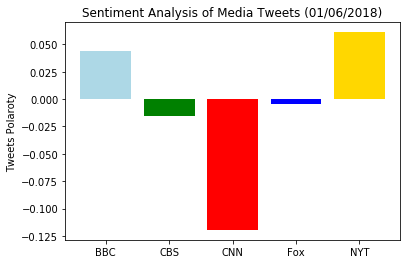

In [18]:
##########################################################
###
## Bar Chart
##
###
##########################################################


x_ticks = ("BBC","CBS","CNN","Fox","NYT")
colors = ("lightblue","green","red","blue","gold")

#Print the Sentiments
#print(sentiment_list)

print("")
x_pos = [i for i, _ in enumerate(target_terms)]
plt.title("Sentiment Analysis of Media Tweets "  + "(" + current_date + ")")
plt.ylabel("Tweets Polaroty")

plt.xticks(x_pos, x_ticks)
 
plt.bar( x_pos, sentiment_list,  color=colors)
plt.savefig("Media_sources_bar.png")
plt.show()